In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.
#### Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
#### Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18
#### 1. Fit it to a periodic function.

In [2]:
from scipy import optimize

In [5]:
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)

def yearly_temp(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temp, months,
                                      max_temp, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temp, months,
                                      min_temp, [-40, 20, 0])

#### 2.Plot the fit

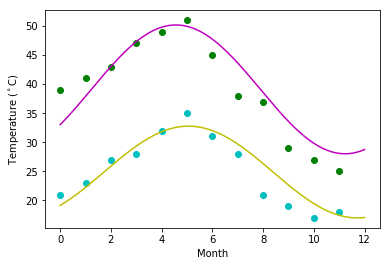

In [6]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, max_temp, 'go')
plt.plot(days, yearly_temp(days, *res_max), 'm-')
plt.plot(months, min_temp, 'co')
plt.plot(days, yearly_temp(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

#### Titanic dataset
#### 1. Create a pie chart presenting the male/female proportion

In [7]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv') 
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
titanic.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

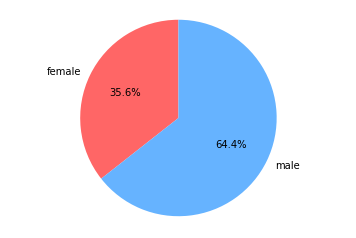

In [9]:
labels=['female','male']
colors = ['#ff6666', '#66b3ff']
sizes_sex=[466,843]
plt.pie(sizes_sex, shadow=False, startangle=90, labels=labels, colors=colors,autopct='%1.1f%%')
plt.axis('equal')

plt.show()

#### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender 

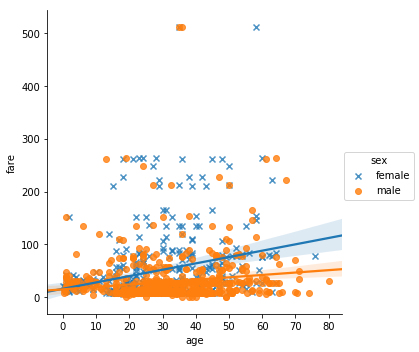

In [10]:
sns.lmplot(x='age',y='fare', hue='sex', data=titanic, markers=['x','o'])